In [1]:
import IPython.display as disp

# Intro to Data Science - Lesson 1: Introduction
The following notes are a summary on [Udacity's online course](https://www.udacity.com/course/intro-to-data-science--ud359)

## Introduction
### Keywords
* Data Scientist

#### What is a Data Scientist?
* A person who knows math and stats.
  * Allows them to identify interesting insights in a sea of data
* Programming skills
  * Code up statistical models and get data from a variety of different sources
* Substantive(meaningful) Expertise
  * Knows which questions to ask
* Can Interpret the data well
  * Understands the structure of the data
* Communication Skills
  * Presenting findings in a meaningful way
* Informative Graphs
  * All in all, the ability to perform complicated analysis on huge datasets.

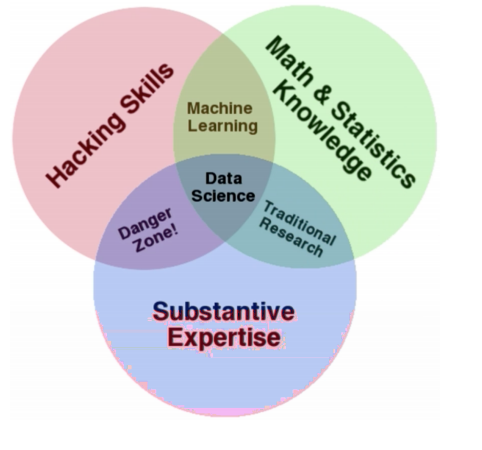

In [2]:
disp.Image(filename='./images/data_scientist.png')

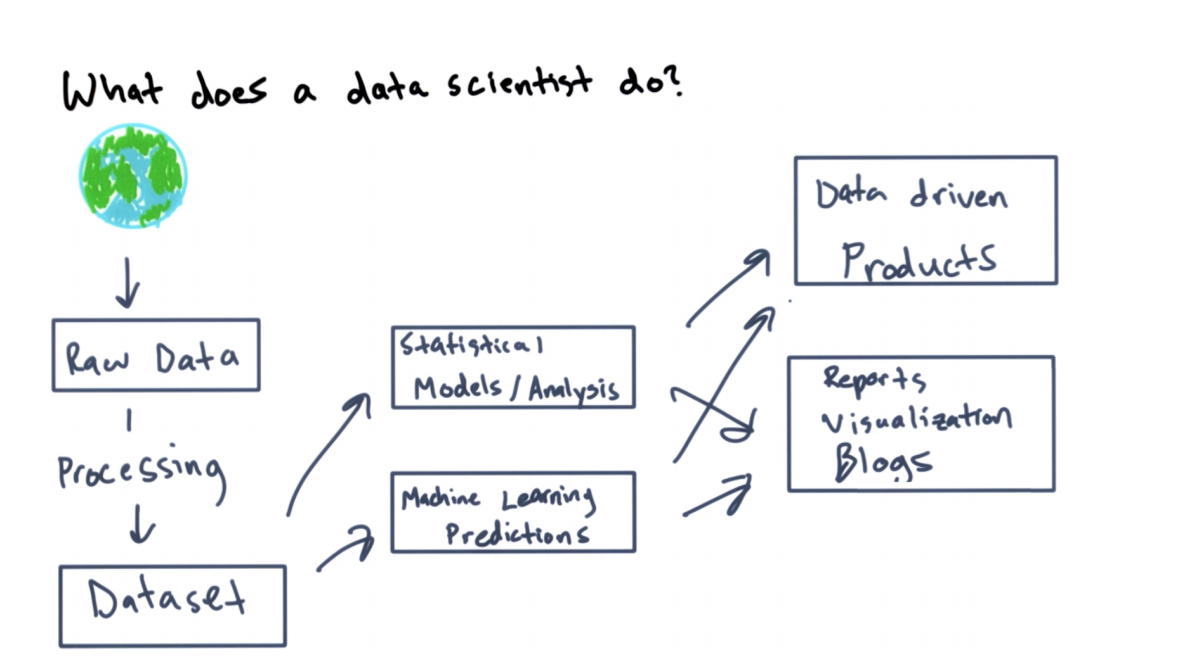

In [3]:
disp.Image(filename="./images/data_scientist_responsibilities.png")

#### Tools We'll Use
* Numpy
  * Multidimensional arrays + Matrices
  * Mathematical functions
* Pandas
  * Handle data in a way suited for analysis
  * Similar to R

## Pandas and Numpy

In [4]:
import pandas as pd
import numpy as np

In [5]:
#custom index
series = pd.Series(['Dave', 'Cheng-Han', 359, 9001],
                       index=['Instructor', 'Curriculum Manager',
                              'Course Number', 'Power Level'])
print series

Instructor                 Dave
Curriculum Manager    Cheng-Han
Course Number               359
Power Level                9001
dtype: object


In [6]:
#boolean indexing
cuteness = pd.Series([0, 1, 2, 3, 4, 5], index=['Cockroach', 'Fish', 'Mini',   
                                              'Pig', 'Puppy', 'Kitten'])
print cuteness > 3
print ""
print cuteness[cuteness > 3]
                                             

Cockroach    False
Fish         False
Mini         False
Pig          False
Puppy         True
Kitten        True
dtype: bool

Puppy     4
Kitten    5
dtype: int64


In [7]:
'''
Pandas also has various functions that will help you understand some basic
information about your data frame. Some of these functions are:
1) dtypes: to get the datatype for each column
2) describe: useful for seeing basic statistics of the dataframe's numerical
   columns
3) head: displays the first five rows of the dataset
4) tail: displays the last five rows of the dataset
'''
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions',
                 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data)
print football
print ""
print football.dtypes
print ""
print football.describe()
print ""
print football.head()
print ""
print football.tail()


   losses     team  wins  year
0       5    Bears    11  2010
1       8    Bears     8  2011
2       6    Bears    10  2012
3       1  Packers    15  2011
4       5  Packers    11  2012
5      10    Lions     6  2010
6       6    Lions    10  2011
7      12    Lions     4  2012

losses     int64
team      object
wins       int64
year       int64
dtype: object

          losses       wins         year
count   8.000000   8.000000     8.000000
mean    6.625000   9.375000  2011.125000
std     3.377975   3.377975     0.834523
min     1.000000   4.000000  2010.000000
25%     5.000000   7.500000  2010.750000
50%     6.000000  10.000000  2011.000000
75%     8.500000  11.000000  2012.000000
max    12.000000  15.000000  2012.000000

   losses     team  wins  year
0       5    Bears    11  2010
1       8    Bears     8  2011
2       6    Bears    10  2012
3       1  Packers    15  2011
4       5  Packers    11  2012

   losses     team  wins  year
3       1  Packers    15  2011
4       5  Packers

In [8]:
'''
Compute the average number of bronze medals earned by countries who 
earned at least one gold medal.  

Save this to a variable named avg_bronze_at_least_one_gold. You do not
need to call the function in your code when running it in the browser -
the grader will do that automatically when you submit or test it.

HINT-1:
You can retrieve all of the values of a Pandas column from a 
data frame, "df", as follows:
df['column_name']

HINT-2:
The numpy.mean function can accept as an argument a single
Pandas column. 

For example, numpy.mean(df["col_name"]) would return the 
mean of the values located in "col_name" of a dataframe df.
'''


countries = ['Russian Fed.', 'Norway', 'Canada', 'United States',
             'Netherlands', 'Germany', 'Switzerland', 'Belarus',
             'Austria', 'France', 'Poland', 'China', 'Korea', 
             'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
             'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
             'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan']

gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]

olympic_medal_counts = {'country_name':pd.Series(countries),
                        'gold': pd.Series(gold),
                        'silver': pd.Series(silver),
                        'bronze': pd.Series(bronze)}
df = pd.DataFrame(olympic_medal_counts)
print("Bronze medal average of countries with at least one gold:")
print(np.mean(df[df.gold > 0].bronze))

print("\nAverages of bronze, silver, and gold medals:")
print(df[['bronze','silver','gold']].apply(np.mean))

Bronze medal average of countries with at least one gold:
4.2380952381

Averages of bronze, silver, and gold medals:
bronze    3.807692
silver    3.730769
gold      3.807692
dtype: float64


In [9]:
'''
Imagine a point system in which each country is awarded 4 points for each
gold medal,  2 points for each silver medal, and one point for each 
bronze medal.  

Using the numpy.dot function, create a new dataframe called 
'olympic_points_df' that includes:
    a) a column called 'country_name' with the country name
    b) a column called 'points' with the total number of points the country
       earned at the Sochi olympics.

You do not need to call the function in your code when running it in the
browser - the grader will do that automatically when you submit or test it.
'''

countries = ['Russian Fed.', 'Norway', 'Canada', 'United States',
             'Netherlands', 'Germany', 'Switzerland', 'Belarus',
             'Austria', 'France', 'Poland', 'China', 'Korea', 
             'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
             'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
             'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan']

gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]

df = pd.DataFrame({'gold': gold,
                   'silver': silver,
                   'bronze': bronze})

olympic_points_df = pd.DataFrame({'country_name': countries,
                                  'points': np.dot(df[['gold','silver','bronze']],[4,2,1])})
print(olympic_points_df)

      country_name  points
0     Russian Fed.      83
1           Norway      64
2           Canada      65
3    United States      62
4      Netherlands      55
5          Germany      49
6      Switzerland      32
7          Belarus      21
8          Austria      37
9           France      31
10          Poland      19
11           China      22
12           Korea      20
13          Sweden      28
14  Czech Republic      18
15        Slovenia      16
16           Japan      15
17         Finland      11
18   Great Britain       8
19         Ukraine       5
20        Slovakia       4
21           Italy      10
22          Latvia       6
23       Australia       5
24         Croatia       2
25      Kazakhstan       1


In [12]:
def css_styling():
    styles = open("./css/custom.css", "r").read()
    return disp.HTML(styles)
css_styling()